<a href="https://colab.research.google.com/github/hihohub/umbrella-networks/blob/main/etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Umbrella networks
- copyright 2021 by James Smith
- contact - derekjsmit@gmail.com

Demonstration instructions
- Examples of helpful functions like save, load, and display predicted labels.
- Organize your image files into folders by category. For example, (book covers) -> (scifi), (fantasy), (mystery).
- First, run the large cell containing the umbrella code, then scroll down 1333 lines to the experiment.
- Change the folder name in the demonstration code to your folder path.
- The rest of the code should work as written.
- Set 'levels' to anywhere from 1 to the number of layers in your folder structure. If levels=1, images from lower level folders are compressed into the outer level folders. If levels > 1, umbrella networks are formed recursively, one for each outer folder and each subfolder within the outer folders, up to the specified number of levels. The inner folders do not each require the same number of levels, but must have at least as many levels as the value specified for 'levels'.

Umbrella network instructions<br/>
- The umbrella code was designed for reading a local folder and automatically constructing the hierarchical network from the implicit hierarchy in the subfolders.
- If have images in folders, initialize with images_folder = path. Umbrella network constructs tree by itself. Refer to examples.
- However, it also has functions for reading the data from an online repository and building the tree node by node (since the data has no folder structure).
- If loading data from repository, initialize with images_folder = None, then use repo functions. Must first preprocess the data (normalize, reshape). Only process x data, not labels. Umbrella network constructs labels by itself. However, subdivide classes by label, then manually construct tree with repo functions. Finally, init_from_repo(). Refer to examples.
- In repo mode, umbrella network throws away labels and makes its own. For example, if divide MNIST into odd and even numbers, each subset will have labels 0-4. Hence, anything other than flat topology requires that the umbrella network form new labels.






In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


%%%%%%%%%%%%%%%%%%<br/>
UMBRELLA NETWORK<br/>
%%%%%%%%%%%%%%%%%%<br/>

In [2]:
! wget https://raw.githubusercontent.com/hihohub/umbrella-networks/main/umbrella.py

--2022-04-18 02:37:47--  https://raw.githubusercontent.com/hihohub/umbrella-networks/main/umbrella.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53032 (52K) [text/plain]
Saving to: ‘umbrella.py’

umbrella.py         100%[===================>]  51.79K  --.-KB/s    in 0.01s   

2022-04-18 02:37:47 (4.09 MB/s) - ‘umbrella.py’ saved [53032/53032]



In [3]:
from umbrella import Umbrella_Network,Umbrella_Label,Umbrella_Node,Joint_Probability_Network

In [4]:
import os
import sys
import numpy as np
import math
import random
from PIL import Image, ImageOps, ImageChops
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, add, BatchNormalization, Dropout, AveragePooling2D, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.utils import to_categorical
from tensorflow.python.framework.ops import disable_eager_execution
from tensorflow.keras import backend as backend
from keras.callbacks import ReduceLROnPlateau
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
import copy
import time

- ##################
- Demonstrate helpful functions
- when predicting validation or test images, set verbose=True to view images and predicted labels
- save images separately from models, always save images first
- load both when reloading, always load images first
- ##################

SIGMOID ON SMALL MULTI-LAYER STRUCTURE COMPRESSED INTO TOP LEVEL FOLDERS

In [11]:
network_type = 'softmax'
images_folder = "/content/drive/My Drive/5390/project/small_hierarchy"
serial_file = "/content/drive/My Drive/Colab Notebooks/small_hierarchy.dat"
models_folder = "/content/drive/My Drive/Colab Notebooks/models"
target_image_size = 30
levels = 2
channels = 3
valid_ratio = 0.1 # validation set
test_ratio = 0.1 # test set
initialize_now = True
MODEL = Umbrella_Network(network_type,images_folder,serial_file,models_folder,target_image_size,channels,levels,valid_ratio,test_ratio,initialize_now)

In [12]:
MODEL.traverse_training_data()

small_hierarchy trainX 137 (137,) trainY 137 (137, 3)
   animals trainX 35 (35,) trainY 35 (35, 4)
      alligator trainX 0 (0,) trainY 0 (0,)
      mammals trainX 0 (0,) trainY 0 (0,)
      salamanders trainX 0 (0,) trainY 0 (0,)
      snake trainX 0 (0,) trainY 0 (0,)
   objects trainX 51 (51,) trainY 51 (51, 3)
      automobiles trainX 0 (0,) trainY 0 (0,)
      bicycles trainX 0 (0,) trainY 0 (0,)
      boats trainX 0 (0,) trainY 0 (0,)
   plants trainX 51 (51,) trainY 51 (51, 3)
      cactus trainX 0 (0,) trainY 0 (0,)
      hedges trainX 0 (0,) trainY 0 (0,)
      shrubs trainX 0 (0,) trainY 0 (0,)


In [13]:
MODEL.make_models()

making model for small_hierarchy
making model for animals
making model for objects
making model for plants


In [14]:
MODEL.train_models(eps=1,batch=10,aug=False,vrb=True)

training model for small_hierarchy
trainX 137
trainY 137
14/14 [==============================] - 1s 5ms/step - loss: 1.0842 - accuracy: 0.3650
training model for animals
trainX 35
trainY 35
4/4 [==============================] - 1s 16ms/step - loss: 1.4232 - accuracy: 0.2857
training model for objects
trainX 51
trainY 51
6/6 [==============================] - 1s 26ms/step - loss: 1.1052 - accuracy: 0.3725
training model for plants
trainX 51
trainY 51
6/6 [==============================] - 0s 5ms/step - loss: 1.1327 - accuracy: 0.3529


average training accuracy 0.344042
average training loss 1.186347
17


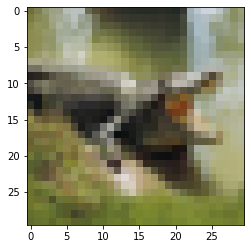


valid
animals 1
alligator 1
small_hierarchy [1, 0, 0]
  animals [1, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.4570310413837433
automobiles 0.37869712710380554
small_hierarchy [0.30246192 0.45703104 0.24050708]
  animals [0.22909814 0.34287792 0.24783355 0.1801904 ]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.37869713 0.31530926 0.30599362]
    automobiles []
    bicycles []
    boats []
  plants [0.20150413 0.35904992 0.43944594]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.37869713, 0.31530926, 0.30599362, 0, 0, 0]


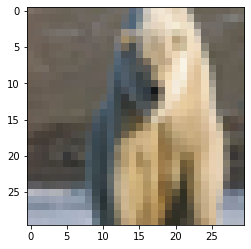


valid
animals 1
mammals 1
small_hierarchy [1, 0, 0]
  animals [0, 1, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.4848443865776062
automobiles 0.4029434025287628
small_hierarchy [0.302704  0.4848444 0.2124516]
  animals [0.20688346 0.42083225 0.21540466 0.15687968]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.4029434  0.3032698  0.29378676]
    automobiles []
    bicycles []
    boats []
  plants [0.2022541  0.34711123 0.4506347 ]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.4029434, 0.3032698, 0.29378676, 0, 0, 0]


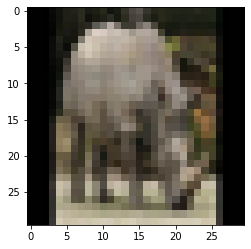


valid
animals 1
mammals 1
small_hierarchy [1, 0, 0]
  animals [0, 1, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.4288334250450134
automobiles 0.37749654054641724
small_hierarchy [0.3107733  0.42883343 0.26039323]
  animals [0.22643636 0.3530142  0.24303891 0.17751047]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.37749654 0.32931736 0.2931861 ]
    automobiles []
    bicycles []
    boats []
  plants [0.23163916 0.3401269  0.42823395]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.37749654, 0.32931736, 0.2931861, 0, 0, 0]


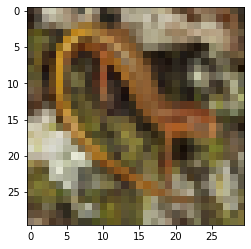


valid
animals 1
salamanders 1
small_hierarchy [1, 0, 0]
  animals [0, 0, 1, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.4163776934146881
automobiles 0.4046957194805145
small_hierarchy [0.30468565 0.4163777  0.27893668]
  animals [0.23639093 0.32536778 0.25278264 0.18545865]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.40469572 0.3210176  0.2742867 ]
    automobiles []
    bicycles []
    boats []
  plants [0.21639995 0.35660806 0.426992  ]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.40469572, 0.3210176, 0.2742867, 0, 0, 0]


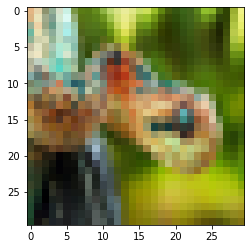


valid
animals 1
snake 1
small_hierarchy [1, 0, 0]
  animals [0, 0, 0, 1]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.41880354285240173
automobiles 0.42307472229003906
small_hierarchy [0.3173303  0.41880354 0.2638662 ]
  animals [0.23878174 0.30621016 0.27937818 0.17562994]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.42307472 0.29162616 0.28529912]
    automobiles []
    bicycles []
    boats []
  plants [0.20349416 0.34829623 0.44820967]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.42307472, 0.29162616, 0.28529912, 0, 0, 0]


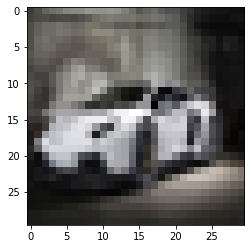


valid
objects 1
automobiles 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [1, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.5339154005050659
automobiles 0.3734029233455658
small_hierarchy [0.275679   0.5339154  0.19040562]
  animals [0.24194746 0.37304193 0.24309264 0.14191797]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.37340292 0.3045827  0.3220144 ]
    automobiles []
    bicycles []
    boats []
  plants [0.19892868 0.3444143  0.456657  ]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.37340292, 0.3045827, 0.3220144, 0, 0, 0]


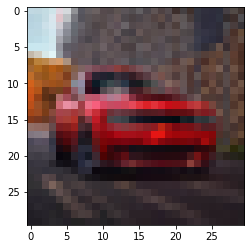


valid
objects 1
automobiles 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [1, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.42080509662628174
automobiles 0.39356929063796997
small_hierarchy [0.3125327  0.4208051  0.26666227]
  animals [0.24877234 0.28500846 0.26744592 0.19877326]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.3935693  0.28355762 0.32287306]
    automobiles []
    bicycles []
    boats []
  plants [0.2339784  0.35630497 0.40971664]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.3935693, 0.28355762, 0.32287306, 0, 0, 0]


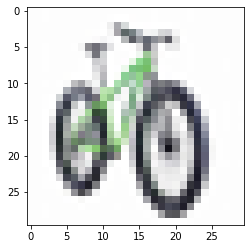


valid
objects 1
bicycles 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 1, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.6436697244644165
automobiles 0.3752014636993408
small_hierarchy [0.21681076 0.6436697  0.1395196 ]
  animals [0.21969134 0.406867   0.2431538  0.13028792]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.37520146 0.3413904  0.28340808]
    automobiles []
    bicycles []
    boats []
  plants [0.13109325 0.35451493 0.51439184]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.37520146, 0.3413904, 0.28340808, 0, 0, 0]


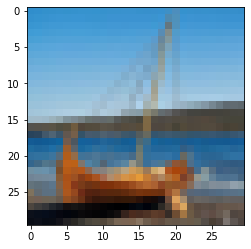


valid
objects 1
boats 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 1]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.6020145416259766
automobiles 0.3676668405532837
small_hierarchy [0.21361889 0.60201454 0.18436661]
  animals [0.22787578 0.35599676 0.22952783 0.1865996 ]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.36766684 0.31317097 0.31916216]
    automobiles []
    bicycles []
    boats []
  plants [0.1850835  0.35622674 0.45868975]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.36766684, 0.31317097, 0.31916216, 0, 0, 0]


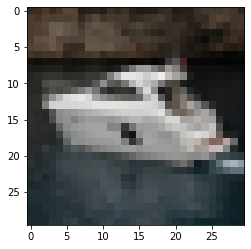


valid
objects 1
boats 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 1]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.46614766120910645
automobiles 0.4348374605178833
small_hierarchy [0.31189144 0.46614766 0.2219609 ]
  animals [0.23188302 0.35468492 0.24848634 0.16494574]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.43483746 0.29084596 0.27431655]
    automobiles []
    bicycles []
    boats []
  plants [0.21836944 0.34206483 0.43956566]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.43483746, 0.29084596, 0.27431655, 0, 0, 0]


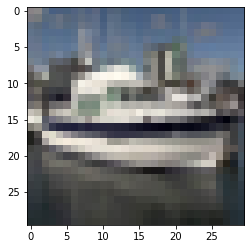


valid
objects 1
boats 1
small_hierarchy [0, 1, 0]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 1]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.5451298356056213
automobiles 0.38811352849006653
small_hierarchy [0.2615208  0.54512984 0.19334933]
  animals [0.22859783 0.38054076 0.22743316 0.16342823]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.38811353 0.29712015 0.31476632]
    automobiles []
    bicycles []
    boats []
  plants [0.20341924 0.3434444  0.45313632]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.38811353, 0.29712015, 0.31476632, 0, 0, 0]


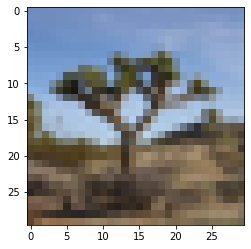


valid
plants 1
cactus 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [1, 0, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.5616941452026367
automobiles 0.3810085356235504
small_hierarchy [0.24845968 0.56169415 0.18984619]
  animals [0.22665586 0.37543786 0.24095212 0.15695412]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.38100854 0.2914434  0.32754803]
    automobiles []
    bicycles []
    boats []
  plants [0.17888846 0.36095738 0.46015418]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.38100854, 0.2914434, 0.32754803, 0, 0, 0]


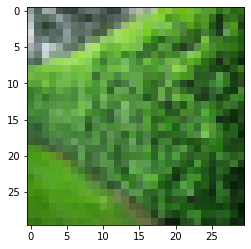


valid
plants 1
hedges 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 1, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.39153188467025757
automobiles 0.3835965692996979
small_hierarchy [0.30331683 0.39153188 0.30515125]
  animals [0.2442704  0.29284382 0.2636394  0.19924639]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.38359657 0.30130598 0.31509745]
    automobiles []
    bicycles []
    boats []
  plants [0.22222318 0.354201   0.42357582]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.38359657, 0.30130598, 0.31509745, 0, 0, 0]


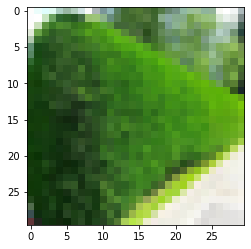


valid
plants 1
hedges 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 1, 0]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.38098302483558655
automobiles 0.38529014587402344
small_hierarchy [0.295846   0.38098302 0.32317096]
  animals [0.22659741 0.3094921  0.27824444 0.18566602]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.38529015 0.32972527 0.28498462]
    automobiles []
    bicycles []
    boats []
  plants [0.24382813 0.3417031  0.4144688 ]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.38529015, 0.32972527, 0.28498462, 0, 0, 0]


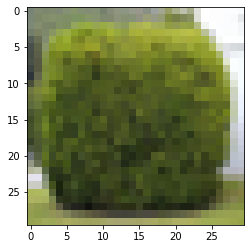


valid
plants 1
shrubs 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 1]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.378107488155365
automobiles 0.3895978629589081
small_hierarchy [0.3109226  0.3781075  0.31096992]
  animals [0.23820187 0.29524294 0.2580747  0.2084805 ]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.38959786 0.29722613 0.313176  ]
    automobiles []
    bicycles []
    boats []
  plants [0.24184878 0.35752895 0.40062222]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.38959786, 0.29722613, 0.313176, 0, 0, 0]


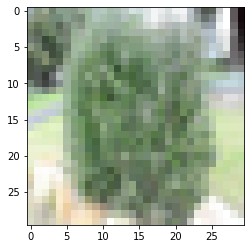


valid
plants 1
shrubs 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 1]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.5022587180137634
automobiles 0.38084346055984497
small_hierarchy [0.2573451  0.5022587  0.24039617]
  animals [0.22524975 0.36500666 0.2300907  0.1796529 ]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.38084346 0.31151032 0.30764624]
    automobiles []
    bicycles []
    boats []
  plants [0.19094823 0.3657425  0.44330925]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.38084346, 0.31151032, 0.30764624, 0, 0, 0]


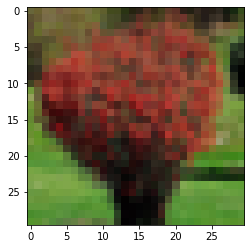


valid
plants 1
shrubs 1
small_hierarchy [0, 0, 1]
  animals [0, 0, 0, 0]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0, 0, 0]
    automobiles []
    bicycles []
    boats []
  plants [0, 0, 1]
    cactus []
    hedges []
    shrubs []

predicted
objects 0.3677918314933777
automobiles 0.41413187980651855
small_hierarchy [0.33889076 0.36779183 0.2933174 ]
  animals [0.23547684 0.31163055 0.2553019  0.19759072]
    alligator []
    mammals []
    salamanders []
    snake []
  objects [0.41413188 0.30551714 0.28035098]
    automobiles []
    bicycles []
    boats []
  plants [0.25085038 0.34772894 0.4014207 ]
    cactus []
    hedges []
    shrubs []
logits [0, 0, 0, 0, 0.41413188, 0.30551714, 0.28035098, 0, 0, 0]

average validation accuracy 0.117647
top 5 accuracy 0.76


In [15]:
MODEL.get_training_accuracy()
logits = MODEL.predict_validation_set(verbose=True) # set verbose=True to view all the images
MODEL.predict_validation_top5()

In [16]:
for logit in logits:
  print(str(logit))

[0, 0, 0, 0, 0.37869713, 0.31530926, 0.30599362, 0, 0, 0]
[0, 0, 0, 0, 0.4029434, 0.3032698, 0.29378676, 0, 0, 0]
[0, 0, 0, 0, 0.37749654, 0.32931736, 0.2931861, 0, 0, 0]
[0, 0, 0, 0, 0.40469572, 0.3210176, 0.2742867, 0, 0, 0]
[0, 0, 0, 0, 0.42307472, 0.29162616, 0.28529912, 0, 0, 0]
[0, 0, 0, 0, 0.37340292, 0.3045827, 0.3220144, 0, 0, 0]
[0, 0, 0, 0, 0.3935693, 0.28355762, 0.32287306, 0, 0, 0]
[0, 0, 0, 0, 0.37520146, 0.3413904, 0.28340808, 0, 0, 0]
[0, 0, 0, 0, 0.36766684, 0.31317097, 0.31916216, 0, 0, 0]
[0, 0, 0, 0, 0.43483746, 0.29084596, 0.27431655, 0, 0, 0]
[0, 0, 0, 0, 0.38811353, 0.29712015, 0.31476632, 0, 0, 0]
[0, 0, 0, 0, 0.38100854, 0.2914434, 0.32754803, 0, 0, 0]
[0, 0, 0, 0, 0.38359657, 0.30130598, 0.31509745, 0, 0, 0]
[0, 0, 0, 0, 0.38529015, 0.32972527, 0.28498462, 0, 0, 0]
[0, 0, 0, 0, 0.38959786, 0.29722613, 0.313176, 0, 0, 0]
[0, 0, 0, 0, 0.38084346, 0.31151032, 0.30764624, 0, 0, 0]
[0, 0, 0, 0, 0.41413188, 0.30551714, 0.28035098, 0, 0, 0]


SAVE AND LOAD IMAGES AND MODELS

In [ ]:
MODEL.save()

small_hierarchy
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/models/model1/assets
animals
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/models/model2/assets
objects
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/models/model3/assets
plants
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/models/model4/assets
INFO:tensorflow:Assets written to: ram://70f9b567-f224-4a52-a6cd-74d66aa2255c/assets
INFO:tensorflow:Assets written to: ram://9cdc932a-1cdd-457c-b921-d13a477cdd12/assets
INFO:tensorflow:Assets written to: ram://4c1bafd3-50cb-4fdb-b6d5-b46478c19d78/assets
INFO:tensorflow:Assets written to: ram://55e6e9c8-c81c-459f-b81d-89d4e21d271d/assets


When reloading a model and its images, set initialize_now = False, otherwise loads images all over again

In [ ]:
initialize_now = False
RELOAD = Umbrella_Network(network_type,images_folder,serial_file,models_folder,target_image_size,channels,levels,valid_ratio,test_ratio,initialize_now)
RELOAD.load()
RELOAD.traverse_training_data()

model loaded into small_hierarchy
model loaded into animals
model loaded into objects
model loaded into plants
could not load model for alligator
could not load model for mammals
could not load model for salamanders
could not load model for snake
could not load model for automobiles
could not load model for bicycles
could not load model for boats
could not load model for cactus
could not load model for hedges
could not load model for shrubs
small_hierarchy trainX 154 (154,) trainY 154 (154, 3)
   animals trainX 39 (39,) trainY 39 (39, 4)
      alligator trainX 0 (0,) trainY 0 (0,)
      mammals trainX 0 (0,) trainY 0 (0,)
      salamanders trainX 0 (0,) trainY 0 (0,)
      snake trainX 0 (0,) trainY 0 (0,)
   objects trainX 57 (57,) trainY 57 (57, 3)
      automobiles trainX 0 (0,) trainY 0 (0,)
      bicycles trainX 0 (0,) trainY 0 (0,)
      boats trainX 0 (0,) trainY 0 (0,)
   plants trainX 58 (58,) trainY 58 (58, 3)
      cactus trainX 0 (0,) trainY 0 (0,)
      hedges trainX 0 (0,

In [ ]:
RELOAD.get_training_accuracy()
logits = RELOAD.predict_validation_set(verbose=False) # set verbose=True to view all the images
RELOAD.predict_validation_top5()

average training accuracy 0.340432
average training loss 1.170876
17

average validation accuracy 0.294118
top 5 accuracy 0.71


In [ ]:
for logit in logits:
  print(str(logit))

[0.18529476, 0.25248244, 0.27170557, 0.29051724, 0.31908724, 0.31276992, 0.3681428, 0.23021118, 0.357819, 0.41196984]
[0.19270265, 0.2525527, 0.2703126, 0.28443205, 0.3197475, 0.32708338, 0.35316914, 0.25045794, 0.36152667, 0.3880154]
[0.1818849, 0.25279826, 0.26881886, 0.29649797, 0.30718923, 0.31081423, 0.38199654, 0.2586387, 0.36678874, 0.37457252]
[0.18599825, 0.25252634, 0.27129334, 0.29018208, 0.3299128, 0.33006757, 0.34001964, 0.21406044, 0.35749575, 0.42844373]
[0.18479723, 0.25266343, 0.27011964, 0.29241967, 0.3122911, 0.31181952, 0.37588933, 0.2391151, 0.3523212, 0.40856376]
[0.18490295, 0.25314394, 0.2657122, 0.29624093, 0.31797725, 0.3053196, 0.3767031, 0.22822763, 0.35002524, 0.42174715]
[0.19633989, 0.25315046, 0.272974, 0.27753568, 0.31659374, 0.311776, 0.37163022, 0.23233402, 0.3606626, 0.4070034]
[0.18410124, 0.25256342, 0.27411595, 0.2892194, 0.3329497, 0.3008633, 0.36618704, 0.23261616, 0.35040873, 0.41697508]
[0.13864358, 0.24878599, 0.28182676, 0.33074367, 0.236772